**Import Necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Reads the CSV file and displays its shape and content.**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/NN/three_class_coordinates.csv')
print(df.shape)
df.head(df.shape[0])

(100, 3)


,x,y,class
0,0.749080,3.931264,1
1,1.901429,3.616795,1
2,1.463988,2.609228,1
3,1.197317,2.195344,1
4,0.312037,3.368466,1
...,...,...,...
95,2.267059,0.698419,3
96,2.071549,1.451911,3
97,1.180580,1.794221,3
98,2.670605,1.774173,3


**Plots a scatter graph to visualize three classes based on their x, y coordinates.**

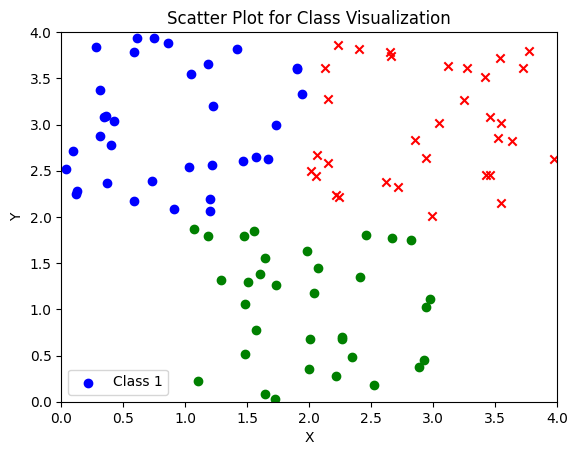

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/NN/three_class_coordinates.csv')

# Assuming the CSV has columns 'x', 'y', and 'class'
# Create a scatter plot
for i in range(len(df)):
    if df['class'][i] == 1:
        plt.scatter(df['x'][i], df['y'][i], color='blue', marker='o', label='Class 1' if i == 0 else "")
    elif df['class'][i] == 2:
        plt.scatter(df['x'][i], df['y'][i], color='red', marker='x', label='Class 2' if i == 0 else "")
    elif df['class'][i] == 3:
        plt.scatter(df['x'][i], df['y'][i], color='green', marker='o', label='Class 3' if i == 0 else "")

# Set the graph range
plt.xlim(0, 4)
plt.ylim(0, 4)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot for Class Visualization')

# Display legend
plt.legend()

# Show the plot
plt.show()


**Shuffles the DataFrame, splits it into features and labels, then divides it into training and test sets.**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame df
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into features and labels (assuming 'class' is the label column)
X = df_shuffled.drop('class', axis=1)
Y = df_shuffled['class']

# Now split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


**Shuffles the DataFrame and displays the entire shuffled dataset.**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame df
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the entire shuffled DataFrame
print(df_shuffled)


           x         y  class
0   2.816532  1.754679      3
1   3.275115  3.614880      2
2   2.406038  1.355129      3
3   2.231738  3.859395      2
4   2.716931  2.322443      2
..       ...       ...    ...
95  3.541934  3.721461      2
96  1.727259  0.033176      3
97  0.363650  3.093421      1
98  2.456433  1.800836      3
99  2.650367  3.785118      2

[100 rows x 3 columns]


## **Network Architecture:**

- **Input Layer**: 2 neurons (default), representing the input features.
- **Hidden Layers**:
  - **First hidden layer**: 15 neurons with ReLU (Rectified Linear Unit) activation.
  - **Second hidden layer**: 15 neurons with Tanh (hyperbolic tangent) activation.
  - **Third hidden layer**: 15 neurons with Sigmoid activation.
- **Output Layer**: 3 neurons, corresponding to 3 possible output classes, with Sigmoid activation (useful for multi-class classification).

## **Key Components:**

- **Weight Initialization**: Random weights are assigned to each layer connection:
  - **W_H1I**: Weights between input and first hidden layer.
  - **W_H2H1**: Weights between first and second hidden layers.
  - **W_H3H2**: Weights between second and third hidden layers.
  - **W_OH3**: Weights between third hidden layer and output layer.
  
- **Bias Initialization**: Random biases are set for each layer to ensure that the network can shift the activation function appropriately.

## **Activation Function:**

The class supports multiple activation functions like:
- **Sigmoid**: Used in output and third hidden layer.
- **Tanh**: Used in the second hidden layer.
- **ReLU**: Used in the first hidden layer.
- **Gaussian** (not used here, but defined in the code for future extensions).

## **Feedforward Process:**

- Input `X` is passed through each layer, with each layer's output being computed as a weighted sum of inputs + bias, followed by an activation function.
- The output of each hidden layer is passed as input to the next hidden layer, and finally, the output layer produces the network's prediction.

## **Backpropagation:**

- The output error (difference between predicted and true values) is propagated backward through the network to update the weights and biases.
- The delta (error signal) for each layer is calculated using the derivative of the activation function.
- Weight updates are done using the gradient of the loss function (mean squared error) and the learning rate.

## **Training Process:**

- The `train` function calls the `feedforward` method to generate predictions, then uses backpropagation to update the weights and biases to minimize the error.


In [7]:
import numpy as np

class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons = 2, hidden1LayerNeurons = 15, hidden2LayerNeurons = 15, hidden3LayerNeurons = 15, outLayerNeurons = 3, learning_rate = 0.01, activation_type: str = 'sigmoid'):

        self.activation_type = activation_type
        self.learning_rate = learning_rate

        # random weight initialization
        self.W_H1I = np.random.randn(inputLayerNeurons, hidden1LayerNeurons)
        self.W_H2H1 = np.random.randn(hidden1LayerNeurons, hidden2LayerNeurons)
        self.W_H3H2 = np.random.randn(hidden2LayerNeurons, hidden3LayerNeurons)
        self.W_OH3 = np.random.randn(hidden3LayerNeurons, outLayerNeurons)

        # random bias initialization
        self.biases = [
            np.random.randn(hidden1LayerNeurons),
            np.random.randn(hidden2LayerNeurons),
            np.random.randn(hidden3LayerNeurons),
            np.random.randn(outLayerNeurons)
        ]

    def activation(self, x, der=False):
        if self.activation_type == 'sigmoid':
            if der == True:
                return np.exp(-x) / (1 + np.exp(-x))**2
            else:
                return 1 / (1 + np.exp(-x))

        if self.activation_type == "tanh":
            if der == True:
                return 1 - (np.tanh(x))**2
            else:
                return np.tanh(x)

        if self.activation_type == "relu":
            if der == True:
                return np.where(x > 0, 1, 0)
            else:
                return np.maximum(0, x)

        if self.activation_type == "gaussian":
            if der == True:
                return -(2 * x * np.exp(-x**2))
            else:
                return np.exp(-x**2)

    def feedForward(self, X):
        # First hidden layer (ReLU activation function)
        hidden1_input = np.dot(X, self.W_H1I) + self.biases[0]
        self.hidden1_output = self.activation(hidden1_input)

        # Second hidden layer (Tanh activation function)
        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1) + self.biases[1]
        self.hidden2_output = self.activation(hidden2_input)

        # Third hidden layer (Sigmoid activation function)
        hidden3_input = np.dot(self.hidden2_output, self.W_H3H2) + self.biases[2]
        self.hidden3_output = self.activation(hidden3_input)

        # Output layer (Softmax or Sigmoid for classification)
        output_input = np.dot(self.hidden3_output, self.W_OH3) + self.biases[3]
        pred = self.activation(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        # Output layer error
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.activation(pred, der=True)

        # Backpropagate through the third hidden layer
        hidden3_error = output_delta.dot(self.W_OH3.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.activation(self.hidden3_output, der=True)

        # Backpropagate through the second hidden layer
        hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.activation(self.hidden2_output, der=True)

        # Backpropagate through the first hidden layer
        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.activation(self.hidden1_output, der=True)

        # Update weights
        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3H2 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_OH3 += self.hidden3_output.T.dot(output_delta)

        # Update biases
        self.biases[0] += self.learning_rate * np.sum(hidden1_delta, axis=0)
        self.biases[1] += self.learning_rate * np.sum(hidden2_delta, axis=0)
        self.biases[2] += self.learning_rate * np.sum(hidden3_delta, axis=0)
        self.biases[3] += self.learning_rate * np.sum(output_delta, axis=0)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


## **Training the Neural Network:**

- **Initialization**: The neural network is initialized with a 'sigmoid' activation function.
- **Training Loop**: The network is trained for 100,000 epochs. For each epoch:
  - The training data (`X_train` and `Y_train`) is used to update the network's weights via backpropagation.
  - The error is calculated as the Mean Squared Error (MSE) between the predicted output and the true labels (with one-hot encoding applied to `Y_train`).
  - Every 10,000 epochs, the error is recorded and printed to monitor progress.
- **Error Visualization**: The error trend over the epochs is plotted to visualize the training process.



Epoch: 10000, Error: 0.11467728377171961
Epoch: 20000, Error: 0.06649956056576356
Epoch: 30000, Error: 0.048348651515064345
Epoch: 40000, Error: 0.03989632222478932
Epoch: 50000, Error: 0.03459353889695536
Epoch: 60000, Error: 0.03101028261888898
Epoch: 70000, Error: 0.028483049457361218
Epoch: 80000, Error: 0.02658219629586574
Epoch: 90000, Error: 0.025059594568485496
Epoch: 100000, Error: 0.023782831567421066


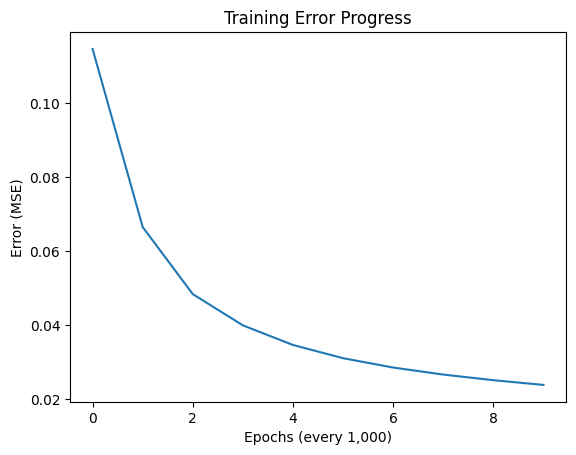

In [8]:
# Initialize the Neural Network with 'sigmoid' activation
NN = NeuralNetwork(activation_type='sigmoid')

# List to store the error values for each epoch
err_list = []

# Train the network for 100,000 epochs
for i in range(100000):  # 100,000 epochs
    # Train the network with the training data (X_train and Y_train)
    NN.train(X_train.values, pd.get_dummies(Y_train).values)  # One-hot encoding for Y_train

    # Calculate the Mean Squared Error (MSE)
    err = np.mean(np.square(pd.get_dummies(Y_train).values - NN.feedForward(X_train.values)))

    # Every 1,000 epochs, append the error to the list and print the progress
    if (i + 1) % 10000 == 0:
        err_list.append(err)
        print(f'Epoch: {i + 1}, Error: {err}')

# Plot the error trend
plt.plot(err_list)
plt.xlabel('Epochs (every 1,000)')
plt.ylabel('Error (MSE)')
plt.title('Training Error Progress')
plt.show()


## **Training the Neural Network and Visualizing Decision Boundaries:**

- **Training Loop**: The neural network is trained for **100,000 epochs** using the training data (`X_train` and `Y_train`).
- **Mean Squared Error (MSE)**: The error (MSE) is calculated at each epoch to assess the model's performance. This value represents the difference between the actual and predicted output.
- **Progress Update**: Every 10,000 epochs, the following actions occur:
  - The **error** at that epoch is printed.
  - The **decision boundary** is updated and plotted.
  - The neural network's output for a grid of points is calculated, and the class predictions are visualized using contour plots, helping to see how the decision boundaries evolve during training.
  - The scatter plot displays the training data points, colored by their respective class labels.



Epoch: 10000, Error: 0.02267802972072763


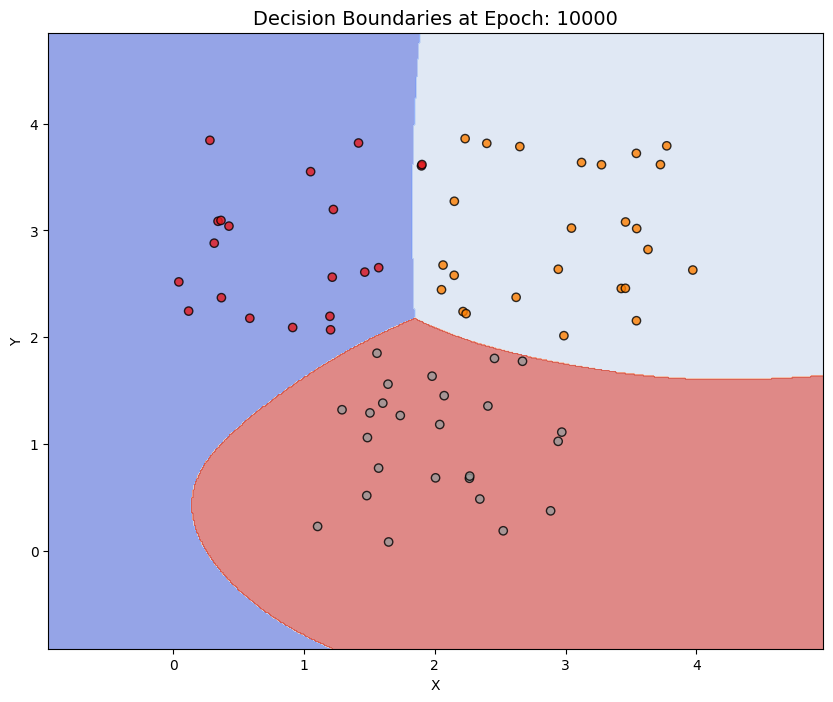

Epoch: 20000, Error: 0.021699453103871513
Epoch: 30000, Error: 0.020816255242089455
Epoch: 40000, Error: 0.020006745087349564
Epoch: 50000, Error: 0.019255453208550273
Epoch: 60000, Error: 0.018551270254119245
Epoch: 70000, Error: 0.017886143040286625
Epoch: 80000, Error: 0.01725415941285453
Epoch: 90000, Error: 0.016650909962720794
Epoch: 100000, Error: 0.016073027662498893


In [9]:
# Train the network for 100,000 epochs
fig, ax = plt.subplots(figsize=(10, 8))  # Setup the plot outside the loop
x_min, x_max = X_train['x'].min() - 1, X_train['x'].max() + 1
y_min, y_max = X_train['y'].min() - 1, X_train['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

for i in range(100000):  # 100,000 epochs
    # Train the network with the training data (X_train and Y_train)
    NN.train(X_train.values, pd.get_dummies(Y_train).values)  # One-hot encoding for Y_train

    # Calculate the Mean Squared Error (MSE)
    err = np.mean(np.square(pd.get_dummies(Y_train).values - NN.feedForward(X_train.values)))

    # Every 10,000 epochs, append the error to the list, print progress, and update decision boundary
    if (i + 1) % 10000 == 0:
        err_list.append(err)
        print(f'Epoch: {i + 1}, Error: {err}')

        # Update the decision boundary plot
        grid_predictions = NN.feedForward(np.c_[xx.ravel(), yy.ravel()])
        grid_classes = np.argmax(grid_predictions, axis=1).reshape(xx.shape)
        ax.clear()
        ax.contourf(xx, yy, grid_classes, alpha=0.6, cmap='coolwarm')  # Updated to 'coolwarm'
        ax.scatter(X_train['x'], X_train['y'], c=Y_train, cmap='Set1', edgecolor='k', alpha=0.8)  # Updated to 'Set1'
        ax.set_title(f'Decision Boundaries at Epoch: {i + 1}', fontsize=14)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.pause(0.1)  # Pause to update the plot


## **Model Evaluation:**

- **Predictions**: The trained neural network is used to make predictions on the test dataset (`X_test`).
- **Class Label Conversion**: The predicted output is converted to class labels using `argmax` for multi-class classification.
- **Evaluation**: The true labels (`Y_test`) are one-hot encoded for comparison. The following evaluation metrics are calculated:
  - **Accuracy**: The overall accuracy of the model.
  - **Precision, Recall, and F1 Score**: These metrics are calculated for each class individually to assess model performance.
- **Results**: The overall accuracy and the precision, recall, and F1 score for each class are printed.


In [10]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Make predictions on the test dataset (X_test)
predictions = NN.feedForward(X_test.values)

# Convert predictions to class labels (for evaluation)
# For a multi-class classification problem, you can use argmax to get the predicted class
predicted_classes = np.argmax(predictions, axis=1)

# One-hot encode Y_test for evaluation
Y_test_encoded = pd.get_dummies(Y_test).values

# Calculate accuracy, precision, recall, and F1 score for each class
accuracy = accuracy_score(np.argmax(Y_test_encoded, axis=1), predicted_classes)
precision, recall, f1, _ = precision_recall_fscore_support(np.argmax(Y_test_encoded, axis=1), predicted_classes, average=None)

# Print the results
print(f'Overall Accuracy: {accuracy * 100:.2f}%')
print('Precision, Recall, F1 score per class:')
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f'Class {i}: Precision = {p:.2f}, Recall = {r:.2f}, F1 Score = {f:.2f}')


Overall Accuracy: 90.00%
Precision, Recall, F1 score per class:
Class 0: Precision = 0.87, Recall = 0.93, F1 Score = 0.90
Class 1: Precision = 0.89, Recall = 1.00, F1 Score = 0.94
Class 2: Precision = 1.00, Recall = 0.75, F1 Score = 0.86


## **Model Evaluation and Confusion Matrix:**

- **Predictions**: The trained neural network is used to make predictions on the test dataset (`X_test`).
- **Class Label Conversion**: The predicted output is converted to class labels using `argmax` for multi-class classification.
- **Evaluation**: The true labels (`Y_test`) are one-hot encoded for comparison. The following evaluation metrics are calculated:
  - **Accuracy**: The overall accuracy of the model.
  - **Precision, Recall, and F1 Score**: These metrics are calculated for each class individually to assess model performance.
- **Confusion Matrix**: A confusion matrix is generated to visualize the performance of the model by comparing the predicted labels with the true labels across all classes.
- **Results**: The overall accuracy and the precision, recall, and F1 score for each class are printed. Additionally, the confusion matrix is displayed as a heatmap for better understanding of misclassifications and overall model performance.


Overall Accuracy: 90.00%
Precision, Recall, F1 score per class:
Class 0: Precision = 0.87, Recall = 0.93, F1 Score = 0.90
Class 1: Precision = 0.89, Recall = 1.00, F1 Score = 0.94
Class 2: Precision = 1.00, Recall = 0.75, F1 Score = 0.86


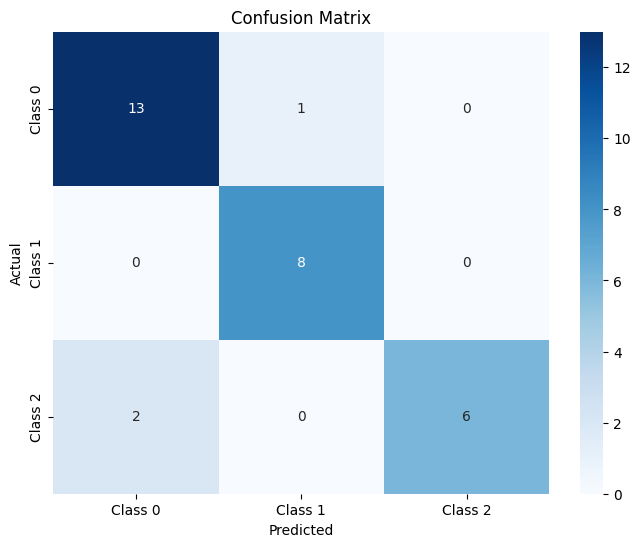

In [11]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test dataset (X_test)
predictions = NN.feedForward(X_test.values)

# Convert predictions to class labels (for evaluation)
predicted_classes = np.argmax(predictions, axis=1)

# One-hot encode Y_test for evaluation
Y_test_encoded = pd.get_dummies(Y_test).values

# Calculate accuracy, precision, recall, and F1 score for each class
accuracy = accuracy_score(np.argmax(Y_test_encoded, axis=1), predicted_classes)
precision, recall, f1, _ = precision_recall_fscore_support(np.argmax(Y_test_encoded, axis=1), predicted_classes, average=None)

# Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(Y_test_encoded, axis=1), predicted_classes)

# Print the results
print(f'Overall Accuracy: {accuracy * 100:.2f}%')
print('Precision, Recall, F1 score per class:')
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f'Class {i}: Precision = {p:.2f}, Recall = {r:.2f}, F1 Score = {f:.2f}')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(len(conf_matrix))], yticklabels=[f"Class {i}" for i in range(len(conf_matrix))])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **Multi-Class ROC Curve and AUC Calculation:**

- **Binarization of True Labels**: The true labels (`Y_test`) are binarized using `LabelBinarizer` to prepare for the multi-class ROC curve calculation.
- **Predictions**: The model outputs class probabilities for each class, which are used to calculate the ROC curve for each class.
- **ROC Curve**: The **Receiver Operating Characteristic (ROC)** curve is plotted for each class. This curve helps to visualize the trade-off between the **True Positive Rate (TPR)** and the **False Positive Rate (FPR)** for different classification thresholds.
  - **AUC (Area Under the Curve)**: The AUC is calculated for each class and displayed in the legend. A higher AUC value indicates better model performance.
- **Random Classifier Line**: A diagonal line is added to the plot, representing the ROC curve of a random classifier.
- **Plot**: The ROC curves for all classes are shown with labels, title, and legend to make the plot clear and interpretable.


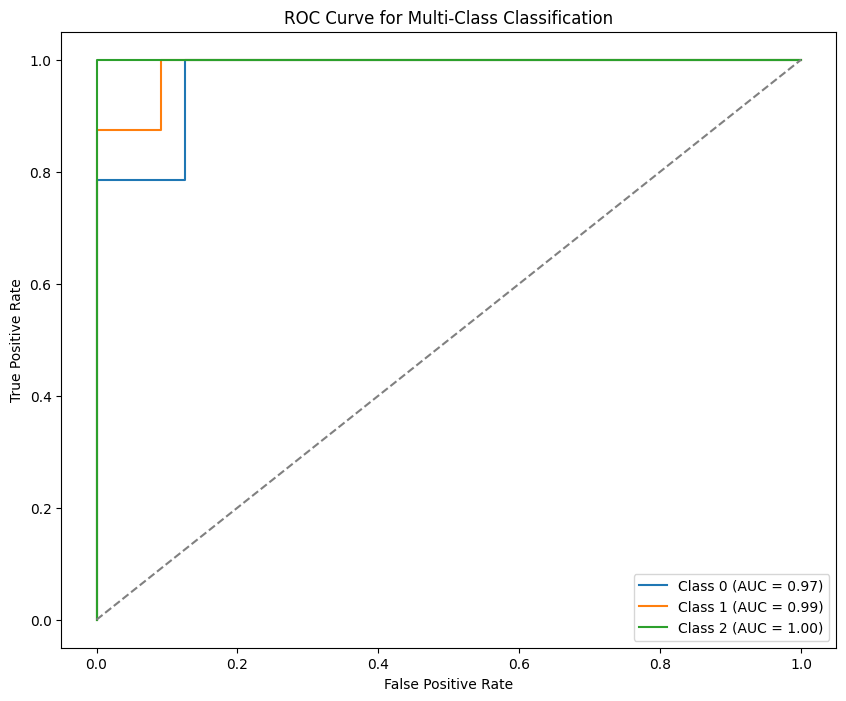

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the true labels (Y_test) for multi-class ROC curve calculation
lb = LabelBinarizer()
Y_test_binarized = lb.fit_transform(Y_test)

# Get the predictions for each class (probabilities)
predictions = NN.feedForward(X_test.values)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

# For each class
for i in range(predictions.shape[1]):
    fpr, tpr, _ = roc_curve(Y_test_binarized[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()
